## Md Tariqul Islam
- ### Assignment-2 
- ### CE888

## 1.	Import Necessary Libraries:

In [401]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

# Preprocessing and feature selection
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer, SimpleImputer

# Model selection and improvement
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handling imbalance in the data
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Decomposition
from sklearn.decomposition import PCA


### To check warning to this project 

In [402]:
import warnings
warnings.filterwarnings('ignore')

## 1.1. Load the Data variables

In [403]:
pathdf = r'content/combined_lagEDA.csv' # Main Dataset Path 
aggtype = ['mean', 'std'] #group ways std
palette = 'flare'
seed = 49
test_size = 0.30 #This is %size of test of this project 
# df = pd.read_csv('content/combined_lagEDA.csv')

In [404]:
# Load the data into a DataFrame df 
df = pd.read_csv(pathdf , encoding='latin1')

### 1.2. Here is Color Plette I will be used in this project plts

In [405]:
#Here is Color Plette 
sns.color_palette(palette, 10)

[(0.92118373, 0.60184659, 0.45048789),
 (0.910403, 0.51342591, 0.39932342),
 (0.89260152, 0.42376366, 0.36526813),
 (0.85754536, 0.33574168, 0.36373567),
 (0.79876118, 0.27347974, 0.39064559),
 (0.71837612, 0.24102046, 0.41863486),
 (0.63329016, 0.21816454, 0.43555493),
 (0.54585987, 0.19467771, 0.44234111),
 (0.46073893, 0.17645017, 0.43417097),
 (0.37562649, 0.15974704, 0.41151182)]

## 1.3. Data Overview of this Dataset 

In [406]:
#Here is my data load function using the pandas library, i Loaded 12445 rows and 49 columns
df = pd.read_csv(pathdf)  
print(df)

             30        29        28        27        26        25        24  \
0      0.132578  0.123534  0.115152  0.110787  0.109565  0.106694  0.100631   
1      0.123534  0.115152  0.110787  0.109565  0.106694  0.100631  0.093710   
2      0.115152  0.110787  0.109565  0.106694  0.100631  0.093710  0.088657   
3      0.110787  0.109565  0.106694  0.100631  0.093710  0.088657  0.084547   
4      0.109565  0.106694  0.100631  0.093710  0.088657  0.084547  0.084598   
...         ...       ...       ...       ...       ...       ...       ...   
12440  0.004501  0.003168  0.002717  0.003151  0.003728  0.003796  0.003643   
12441  0.003168  0.002717  0.003151  0.003728  0.003796  0.003643  0.003660   
12442  0.002717  0.003151  0.003728  0.003796  0.003643  0.003660  0.004153   
12443  0.003151  0.003728  0.003796  0.003643  0.003660  0.004153  0.005282   
12444  0.003728  0.003796  0.003643  0.003660  0.004153  0.005282  0.006165   

             23        22        21  ...  HRR_Mean 

#### All the columns of this data set but I will be used specific columns of this project.

In [407]:
df.columns

Index(['30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19',
       '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7',
       '6', '5', '4', '3', '2', '1', 'EDAR_Mean', 'EDAR_Min', 'EDAR_Max',
       'EDAR_Std', 'EDAR_Kurtosis', 'EDAR_Skew', 'Num_PeaksR',
       'EDAR_Amphitude', 'EDAR_Duration', 'HRR_Mean', 'HRR_Min', 'HRR_Max',
       'HRR_Std', 'HRR_RMS', 'TEMPR_Mean', 'TEMPR_Min', 'TEMPR_Max',
       'TEMPR_Std', 'Stress'],
      dtype='object')

## 1.4. Selected Data for this project "Real-Time Stress Detection"

In [408]:
# Here are my selected only the desired columns for this project below and update data frame df will load future function 
selected_columns = ['EDAR_Mean', 'EDAR_Std', 'Num_PeaksR', 'HRR_Mean','HRR_RMS', 'HRR_Std', 'TEMPR_Mean', 'TEMPR_Std','HRR_Min', 'HRR_Max','Stress']
df = df[selected_columns]
df.head()

EDAR_Mean  EDAR_Std  Num_PeaksR  HRR_Mean   HRR_RMS   HRR_Std  TEMPR_Mean  \
0   0.105191  0.035656         0.0  0.641552  0.235069  0.100525    0.821491   
1   0.102822  0.023788         0.0  0.642973  0.229293  0.089270    0.827471   
2   0.101157  0.018717         0.0  0.643921  0.157093  0.083372    0.832395   
3   0.099952  0.011283         0.0  0.645952  0.131024  0.041375    0.837759   
4   0.099298  0.005735         0.0  0.646764  0.113470  0.066093    0.843123   

   TEMPR_Std   HRR_Min   HRR_Max  Stress  
0   0.120422  0.639566  0.643243     0.0  
1   0.105027  0.639566  0.643243     0.0  
2   0.099446  0.640921  0.645946     0.0  
3   0.089739  0.644986  0.645946     0.0  
4   0.095171  0.644986  0.648649     0.0

In [409]:
# To call df.tail(), it returns the last 5 rows of the dataframe by default. If I wish i can set up custom dataset df.tail(n) n= 1,2,3,4,5,.....
df.tail()

EDAR_Mean  EDAR_Std  Num_PeaksR  HRR_Mean   HRR_RMS   HRR_Std  \
12440   0.067427  0.156687         0.0  0.696047  0.113470  0.037640   
12441   0.078543  0.116968         0.0  0.697062  0.080236  0.032084   
12442   0.085600  0.061269         0.0  0.696927  0.153640  0.052638   
12443   0.088589  0.018788         0.5  0.696182  0.160471  0.053092   
12444   0.088173  0.024395         0.0  0.696317  0.131024  0.049196   

       TEMPR_Mean  TEMPR_Std   HRR_Min   HRR_Max  Stress  
12440    0.504045   0.074744  0.696477  0.694595     0.0  
12441    0.501935   0.088706  0.696477  0.697297     0.0  
12442    0.498065   0.093660  0.696477  0.697297     0.0  
12443    0.497186   0.074585  0.696477  0.697297     0.0  
12444    0.497538   0.047772  0.696477  0.697297     0.0

In [410]:
# df.duplicated(): This function returns a Boolean Series that's the same length as the DataFrame to check duplicated columns.
df.duplicated().sum()

0

### This project targeted variables

In [411]:
# selected columns
targeted_columns = ['EDAR_Mean', 'EDAR_Std', 'Num_PeaksR', 'HRR_Mean', 'HRR_RMS', 'HRR_Std', 'TEMPR_Mean', 'TEMPR_Std', 'HRR_Min', 'HRR_Max']

# Check if all selected columns exist in the dataframe
assert all(column in df.columns for column in targeted_columns), "Some selected columns are not in the dataframe"

# this is feature matrix X using the selected columns
X = df[targeted_columns] # Features

# Define the target variable y
Yvar = 'Stress'  # This is the name of the variable Y to predict (Target variable)
y = df[Yvar]

# Assuming i've done a train-test split and X_train became a numpy array for some reason:
X_train = pd.DataFrame(X_train, columns=targeted_columns)


In [412]:
#  impute missing values using the k-nearest neighbors algorithm.
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## 2. Data Preprocessing:

### Check for missing values

In [413]:
# Check for missing values
df.isnull().sum()

EDAR_Mean     0
EDAR_Std      0
Num_PeaksR    0
HRR_Mean      0
HRR_RMS       0
HRR_Std       0
TEMPR_Mean    0
TEMPR_Std     0
HRR_Min       0
HRR_Max       0
Stress        0
dtype: int64

In [414]:
# If there are missing values, decide how to handle them
# Here we replace them with the mean value of the column
df = df.fillna(df.mean())

In [415]:
# Look for any categorical data that needs to be encoded
df.dtypes

EDAR_Mean     float64
EDAR_Std      float64
Num_PeaksR    float64
HRR_Mean      float64
HRR_RMS       float64
HRR_Std       float64
TEMPR_Mean    float64
TEMPR_Std     float64
HRR_Min       float64
HRR_Max       float64
Stress        float64
dtype: object

In [416]:
#Here is data describe for this project. 
df.describe().T

count      mean       std  min       25%       50%       75%  \
EDAR_Mean   12445.0  0.209896  0.104536  0.0  0.143117  0.206731  0.259721   
EDAR_Std    12445.0  0.063885  0.082410  0.0  0.019800  0.039781  0.075773   
Num_PeaksR  12445.0  0.074126  0.181042  0.0  0.000000  0.000000  0.000000   
HRR_Mean    12445.0  0.531330  0.236169  0.0  0.328595  0.573044  0.740726   
HRR_RMS     12445.0  0.137165  0.048432  0.0  0.103584  0.131024  0.160471   
HRR_Std     12445.0  0.058898  0.030202  0.0  0.043969  0.054869  0.068181   
TEMPR_Mean  12445.0  0.467482  0.206970  0.0  0.322371  0.512487  0.625923   
TEMPR_Std   12445.0  0.082092  0.047557  0.0  0.056860  0.072770  0.093023   
HRR_Min     12445.0  0.529921  0.236633  0.0  0.323848  0.571816  0.739837   
HRR_Max     12445.0  0.532379  0.235474  0.0  0.329730  0.575676  0.740541   
Stress      12445.0  0.949779  0.903741  0.0  0.000000  1.000000  2.000000   

            max  
EDAR_Mean   1.0  
EDAR_Std    1.0  
Num_PeaksR  1.0  
HRR_Mean    1.0  
HRR_RMS     1.0  
HRR_Std     1.0  
TEMPR_Mean  1.0  
TEMPR_Std   1.0  
HRR_Min     1.0  
HRR_Max     1.0  
Stress      2.0

The df.nunique() function in pandas is used to get a count of distinct observations over requested axis. It works on a DataFrame and when called, it returns the number of unique values in each column of the DataFrame.

In [417]:
df.nunique()

EDAR_Mean     10442
EDAR_Std      10489
Num_PeaksR        3
HRR_Mean       6038
HRR_RMS         188
HRR_Std         936
TEMPR_Mean     5504
TEMPR_Std      1629
HRR_Min         369
HRR_Max         369
Stress            3
dtype: int64

In [418]:
object_columns = df.select_dtypes(include='object').columns
print("Object Columns:")
print(object_columns)
print()


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

Object Columns:
Index([], dtype='object')

Numerical Columns:
Index(['EDAR_Mean', 'EDAR_Std', 'Num_PeaksR', 'HRR_Mean', 'HRR_RMS', 'HRR_Std',
       'TEMPR_Mean', 'TEMPR_Std', 'HRR_Min', 'HRR_Max', 'Stress'],
      dtype='object')


### 2.1. Data Transformation 

In [419]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

### 2.2. Data Reduction

In [420]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_scaled)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_reduced = pca.fit_transform(df_imputed)


### 2.3. vData Encoding

In [421]:
# For encoding categorical variables
df_encoded = pd.get_dummies(df)

In [422]:
encoder = LabelEncoder()
df['Stress'] = encoder.fit_transform(df['Stress'])

### Now my data is preprocessed and ready for analysis by modeling

## 3. Exploratory Data Analysis and Visualization

### 3.1. Understanding the dataset:

In [423]:
# Check the shape of the dataset
df.shape

(12445, 11)

### 3.2. Univariate Analysis:

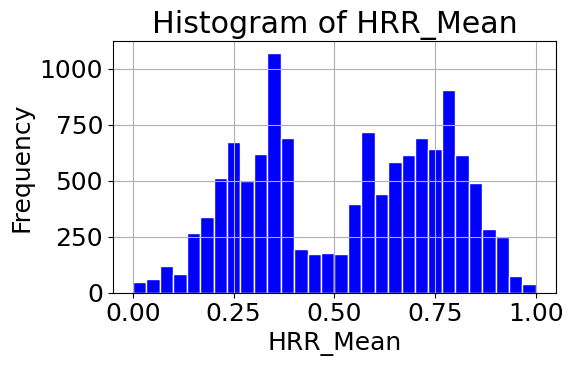

In [424]:

# For numerical features (assuming 'HRR_Mean' is a numerical column in my data)
plt.figure(figsize=(6, 4))  # Set the figure size

df['HRR_Mean'].hist(bins=30, color='blue', edgecolor='white')  # Specify the edgecolor as 'white'
plt.xlabel('HRR_Mean')
plt.ylabel('Frequency')
plt.title('Histogram of HRR_Mean')
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()


### Runtime configuration parameters (rcParams)

Runtime configuration parameters to helps maintain a cohesive visual representation across different figures and enhances the overall quality and professionalism of this project. 

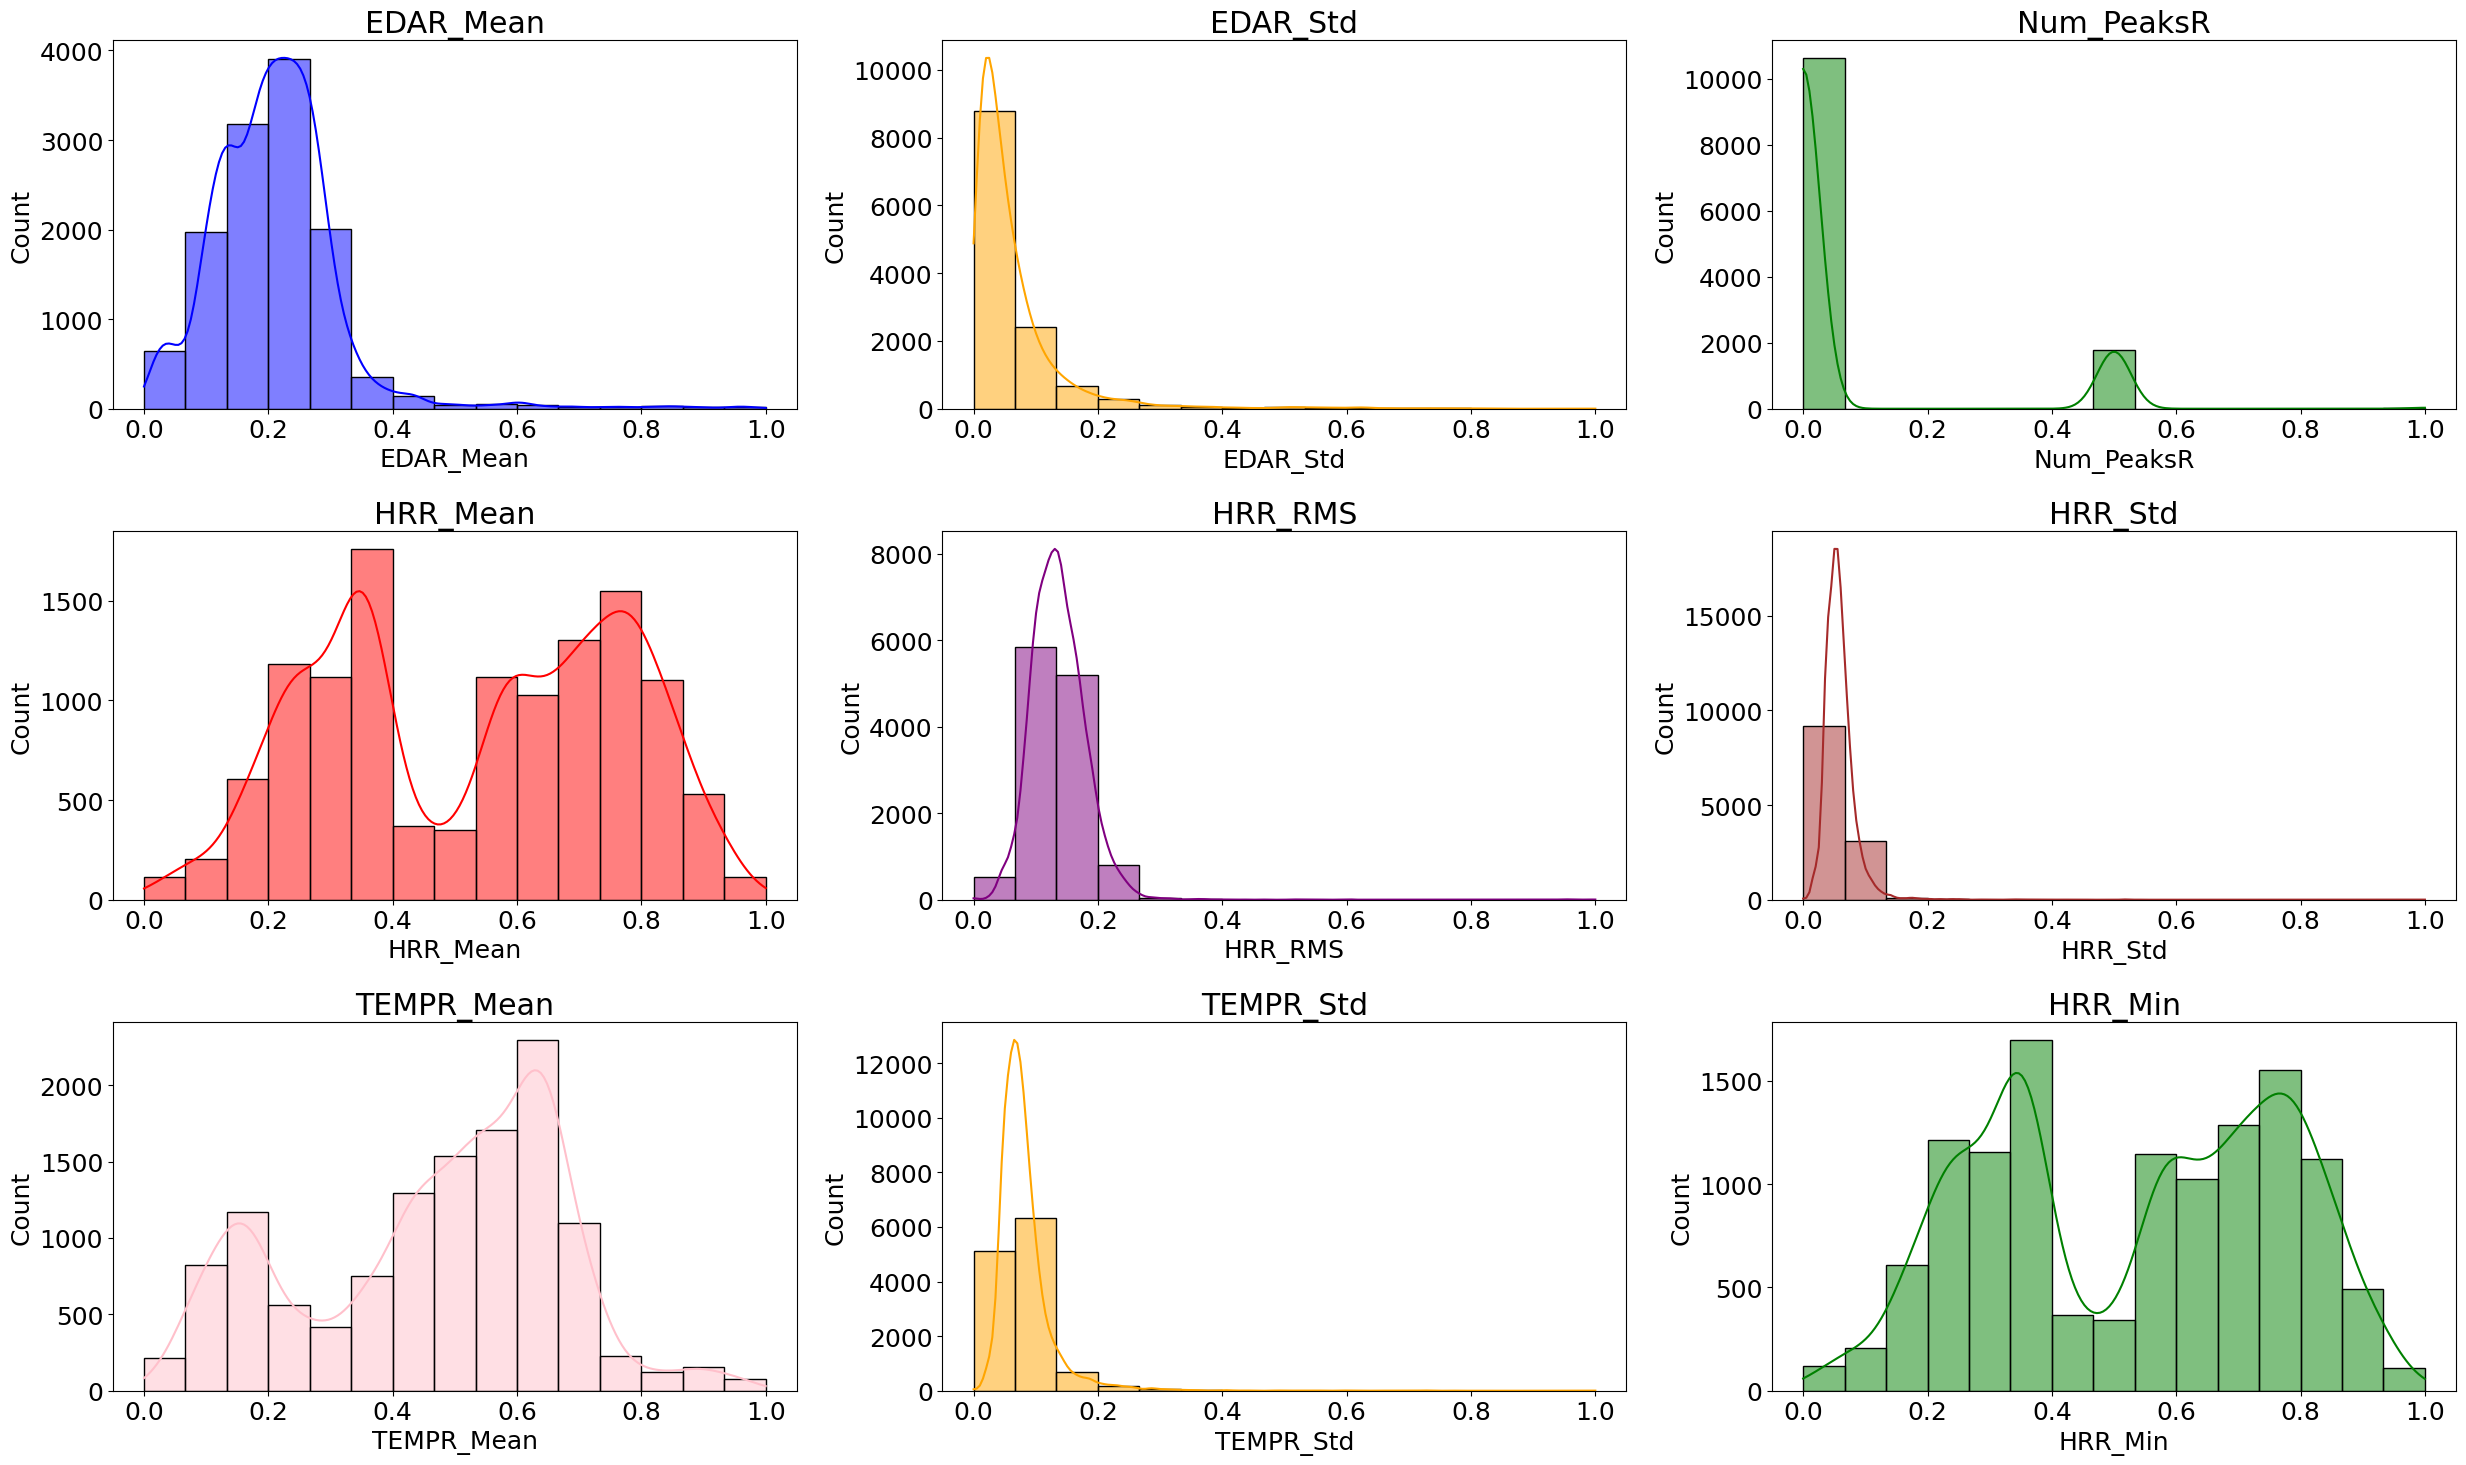

In [425]:
#This is figure size for the plt 25x15 and font size 18
plt.figure(figsize=(25, 15))
plt.rcParams['font.size'] = 18

# Define colors for each column
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'orange', 'green', ]

#The for loop iterates through each column name and its corresponding color from the data.columns and colors lists.
for idx, (column, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[column], bins=15, color=color, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

###  BarPlot to visualize relationships between categorical variables

Bar plots are effective in comparing and visualizing categorical data. They display the distribution or frequency of different categories or groups in a dataset, making it easy to compare values and identify patterns or differences between categories in this project.

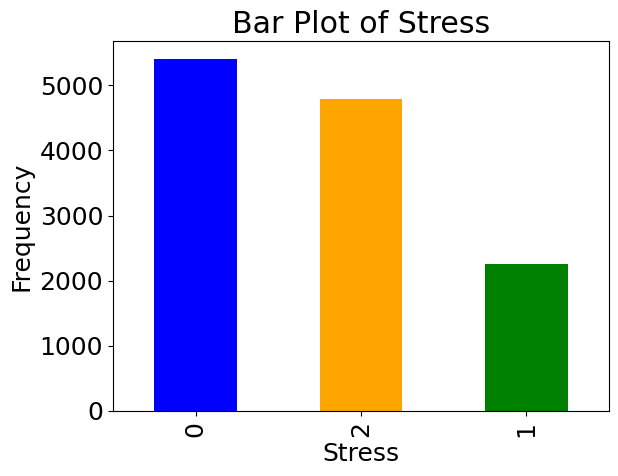

In [426]:
# Define the colors for each category in the 'Stress' column
colors = ['blue', 'orange', 'green']

# Plot the bar plot with colors
df['Stress'].value_counts().plot(kind='bar', color=colors)

# Set the labels and title
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Bar Plot of Stress')

# Show the plot
plt.show()

### Bivariate Analysis:
Bivariate analysis is the analysis of the relationship between two variables. I have to use two variables in future 'HRR_Mean' and 'HRR_Std' are columns from my dataset for Stress level detection. 

In [427]:
# Here is assuming 'df' this DataFrame
df.corr()

EDAR_Mean  EDAR_Std  Num_PeaksR  HRR_Mean   HRR_RMS   HRR_Std  \
EDAR_Mean    1.000000  0.375326    0.007842  0.028150  0.004664  0.012492   
EDAR_Std     0.375326  1.000000   -0.200031 -0.058697  0.024460  0.073785   
Num_PeaksR   0.007842 -0.200031    1.000000  0.013078 -0.010175 -0.013462   
HRR_Mean     0.028150 -0.058697    0.013078  1.000000 -0.112256 -0.128394   
HRR_RMS      0.004664  0.024460   -0.010175 -0.112256  1.000000  0.714278   
HRR_Std      0.012492  0.073785   -0.013462 -0.128394  0.714278  1.000000   
TEMPR_Mean   0.029463 -0.016977   -0.006776 -0.291501  0.031342  0.022783   
TEMPR_Std    0.002551  0.019933   -0.005626  0.090610 -0.014831  0.008214   
HRR_Min      0.028053 -0.059153    0.013150  0.999958 -0.117865 -0.135990   
HRR_Max      0.028356 -0.058069    0.012899  0.999967 -0.107721 -0.122020   
Stress       0.308340  0.075108    0.013914 -0.034776  0.018029  0.031129   

            TEMPR_Mean  TEMPR_Std   HRR_Min   HRR_Max    Stress  
EDAR_Mean     0.029463   0.002551  0.028053  0.028356  0.308340  
EDAR_Std     -0.016977   0.019933 -0.059153 -0.058069  0.075108  
Num_PeaksR   -0.006776  -0.005626  0.013150  0.012899  0.013914  
HRR_Mean     -0.291501   0.090610  0.999958  0.999967 -0.034776  
HRR_RMS       0.031342  -0.014831 -0.117865 -0.107721  0.018029  
HRR_Std       0.022783   0.008214 -0.135990 -0.122020  0.031129  
TEMPR_Mean    1.000000  -0.161525 -0.291425 -0.291709 -0.269011  
TEMPR_Std    -0.161525   1.000000  0.090378  0.090815 -0.014696  
HRR_Min      -0.291425   0.090378  1.000000  0.999885 -0.035004  
HRR_Max      -0.291709   0.090815  0.999885  1.000000 -0.034568  
Stress       -0.269011  -0.014696 -0.035004 -0.034568  1.000000

In [428]:
# I have assuming this DataFrame 'df' and a column name for grouping 'Yvar' target variable y
df.groupby(Yvar).corr() 

EDAR_Mean  EDAR_Std  Num_PeaksR  HRR_Mean   HRR_RMS  \
Stress                                                                   
0      EDAR_Mean    1.000000  0.311763    0.032471  0.036961 -0.035701   
       EDAR_Std     0.311763  1.000000   -0.198056 -0.042510  0.034663   
       Num_PeaksR   0.032471 -0.198056    1.000000  0.012962 -0.016026   
       HRR_Mean     0.036961 -0.042510    0.012962  1.000000 -0.106267   
       HRR_RMS     -0.035701  0.034663   -0.016026 -0.106267  1.000000   
       HRR_Std     -0.043227  0.083540   -0.022884 -0.135003  0.719952   
       TEMPR_Mean   0.090281 -0.045620    0.039128 -0.101396  0.014767   
       TEMPR_Std    0.027046  0.028671    0.003039  0.063376 -0.021886   
       HRR_Min      0.037390 -0.043165    0.013116  0.999955 -0.112162   
       HRR_Max      0.036673 -0.041901    0.012677  0.999965 -0.101435   
1      EDAR_Mean    1.000000  0.405874   -0.027687  0.016246  0.025960   
       EDAR_Std     0.405874  1.000000   -0.210174 -0.023803 -0.000259   
       Num_PeaksR  -0.027687 -0.210174    1.000000  0.003314 -0.004159   
       HRR_Mean     0.016246 -0.023803    0.003314  1.000000 -0.066825   
       HRR_RMS      0.025960 -0.000259   -0.004159 -0.066825  1.000000   
       HRR_Std      0.053092  0.031716   -0.004141 -0.099334  0.763746   
       TEMPR_Mean   0.250392  0.017970   -0.038163 -0.404771  0.011375   
       TEMPR_Std    0.012960  0.014827    0.002076  0.082831 -0.019658   
       HRR_Min      0.015628 -0.024108    0.003469  0.999934 -0.074637   
       HRR_Max      0.017100 -0.023365    0.003278  0.999953 -0.060831   
2      EDAR_Mean    1.000000  0.420906   -0.017802  0.051165  0.026874   
       EDAR_Std     0.420906  1.000000   -0.207471 -0.090419  0.026001   
       Num_PeaksR  -0.017802 -0.207471    1.000000  0.017804 -0.007930   
       HRR_Mean     0.051165 -0.090419    0.017804  1.000000 -0.141046   
       HRR_RMS      0.026874  0.026001   -0.007930 -0.141046  1.000000   
       HRR_Std      0.034704  0.090499   -0.009649 -0.141445  0.680093   
       TEMPR_Mean   0.142974  0.059465   -0.024113 -0.506054  0.084611   
       TEMPR_Std   -0.029397  0.015263   -0.020333  0.127405 -0.003013   
       HRR_Min      0.050855 -0.090734    0.017768  0.999969 -0.145381   
       HRR_Max      0.051525 -0.089705    0.017664  0.999974 -0.137470   

                    HRR_Std  TEMPR_Mean  TEMPR_Std   HRR_Min   HRR_Max  
Stress                                                                  
0      EDAR_Mean  -0.043227    0.090281   0.027046  0.037390  0.036673  
       EDAR_Std    0.083540   -0.045620   0.028671 -0.043165 -0.041901  
       Num_PeaksR -0.022884    0.039128   0.003039  0.013116  0.012677  
       HRR_Mean   -0.135003   -0.101396   0.063376  0.999955  0.999965  
       HRR_RMS     0.719952    0.014767  -0.021886 -0.112162 -0.101435  
       HRR_Std     1.000000    0.006705   0.011635 -0.142946 -0.128354  
       TEMPR_Mean  0.006705    1.000000  -0.165722 -0.101368 -0.101545  
       TEMPR_Std   0.011635   -0.165722   1.000000  0.063163  0.063602  
       HRR_Min    -0.142946   -0.101368   0.063163  1.000000  0.999877  
       HRR_Max    -0.128354   -0.101545   0.063602  0.999877  1.000000  
1      EDAR_Mean   0.053092    0.250392   0.012960  0.015628  0.017100  
       EDAR_Std    0.031716    0.017970   0.014827 -0.024108 -0.023365  
       Num_PeaksR -0.004141   -0.038163   0.002076  0.003469  0.003278  
       HRR_Mean   -0.099334   -0.404771   0.082831  0.999934  0.999953  
       HRR_RMS     0.763746    0.011375  -0.019658 -0.074637 -0.060831  
       HRR_Std     1.000000    0.072654  -0.005799 -0.109027 -0.091422  
       TEMPR_Mean  0.072654    1.000000  -0.145512 -0.405151 -0.404491  
       TEMPR_Std  -0.005799   -0.145512   1.000000  0.082687  0.083000  
       HRR_Min    -0.109027   -0.405151   0.082687  1.000000  0.999818  
       HRR_Max    -0.091422   -0.404491   0.083000  0.999818  1.000000  
2      EDAR_Mean   0.034704    0.142974  -0.

### Scatter plot for two numerical variables

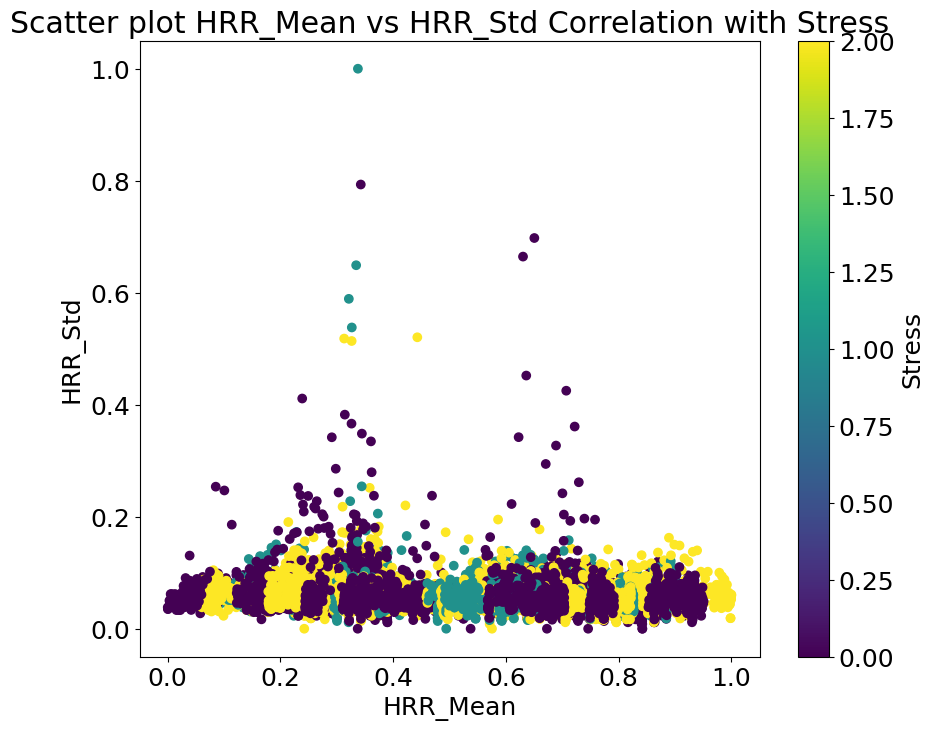

In [429]:
# Scatter plot for two numerical variables (assuming 'HRR_Mean' and 'HRR_Std' are columns in my data)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['HRR_Mean'], df['HRR_Std'], c=df['Stress'], cmap='viridis')
plt.title('Scatter plot HRR_Mean vs HRR_Std Correlation with Stress')
plt.xlabel('HRR_Mean')
plt.ylabel('HRR_Std')

# for te colorbar
plt.colorbar(scatter, label='Stress')
plt.show()


### Multivariate Analysis:

<Figure size 1500x800 with 0 Axes>

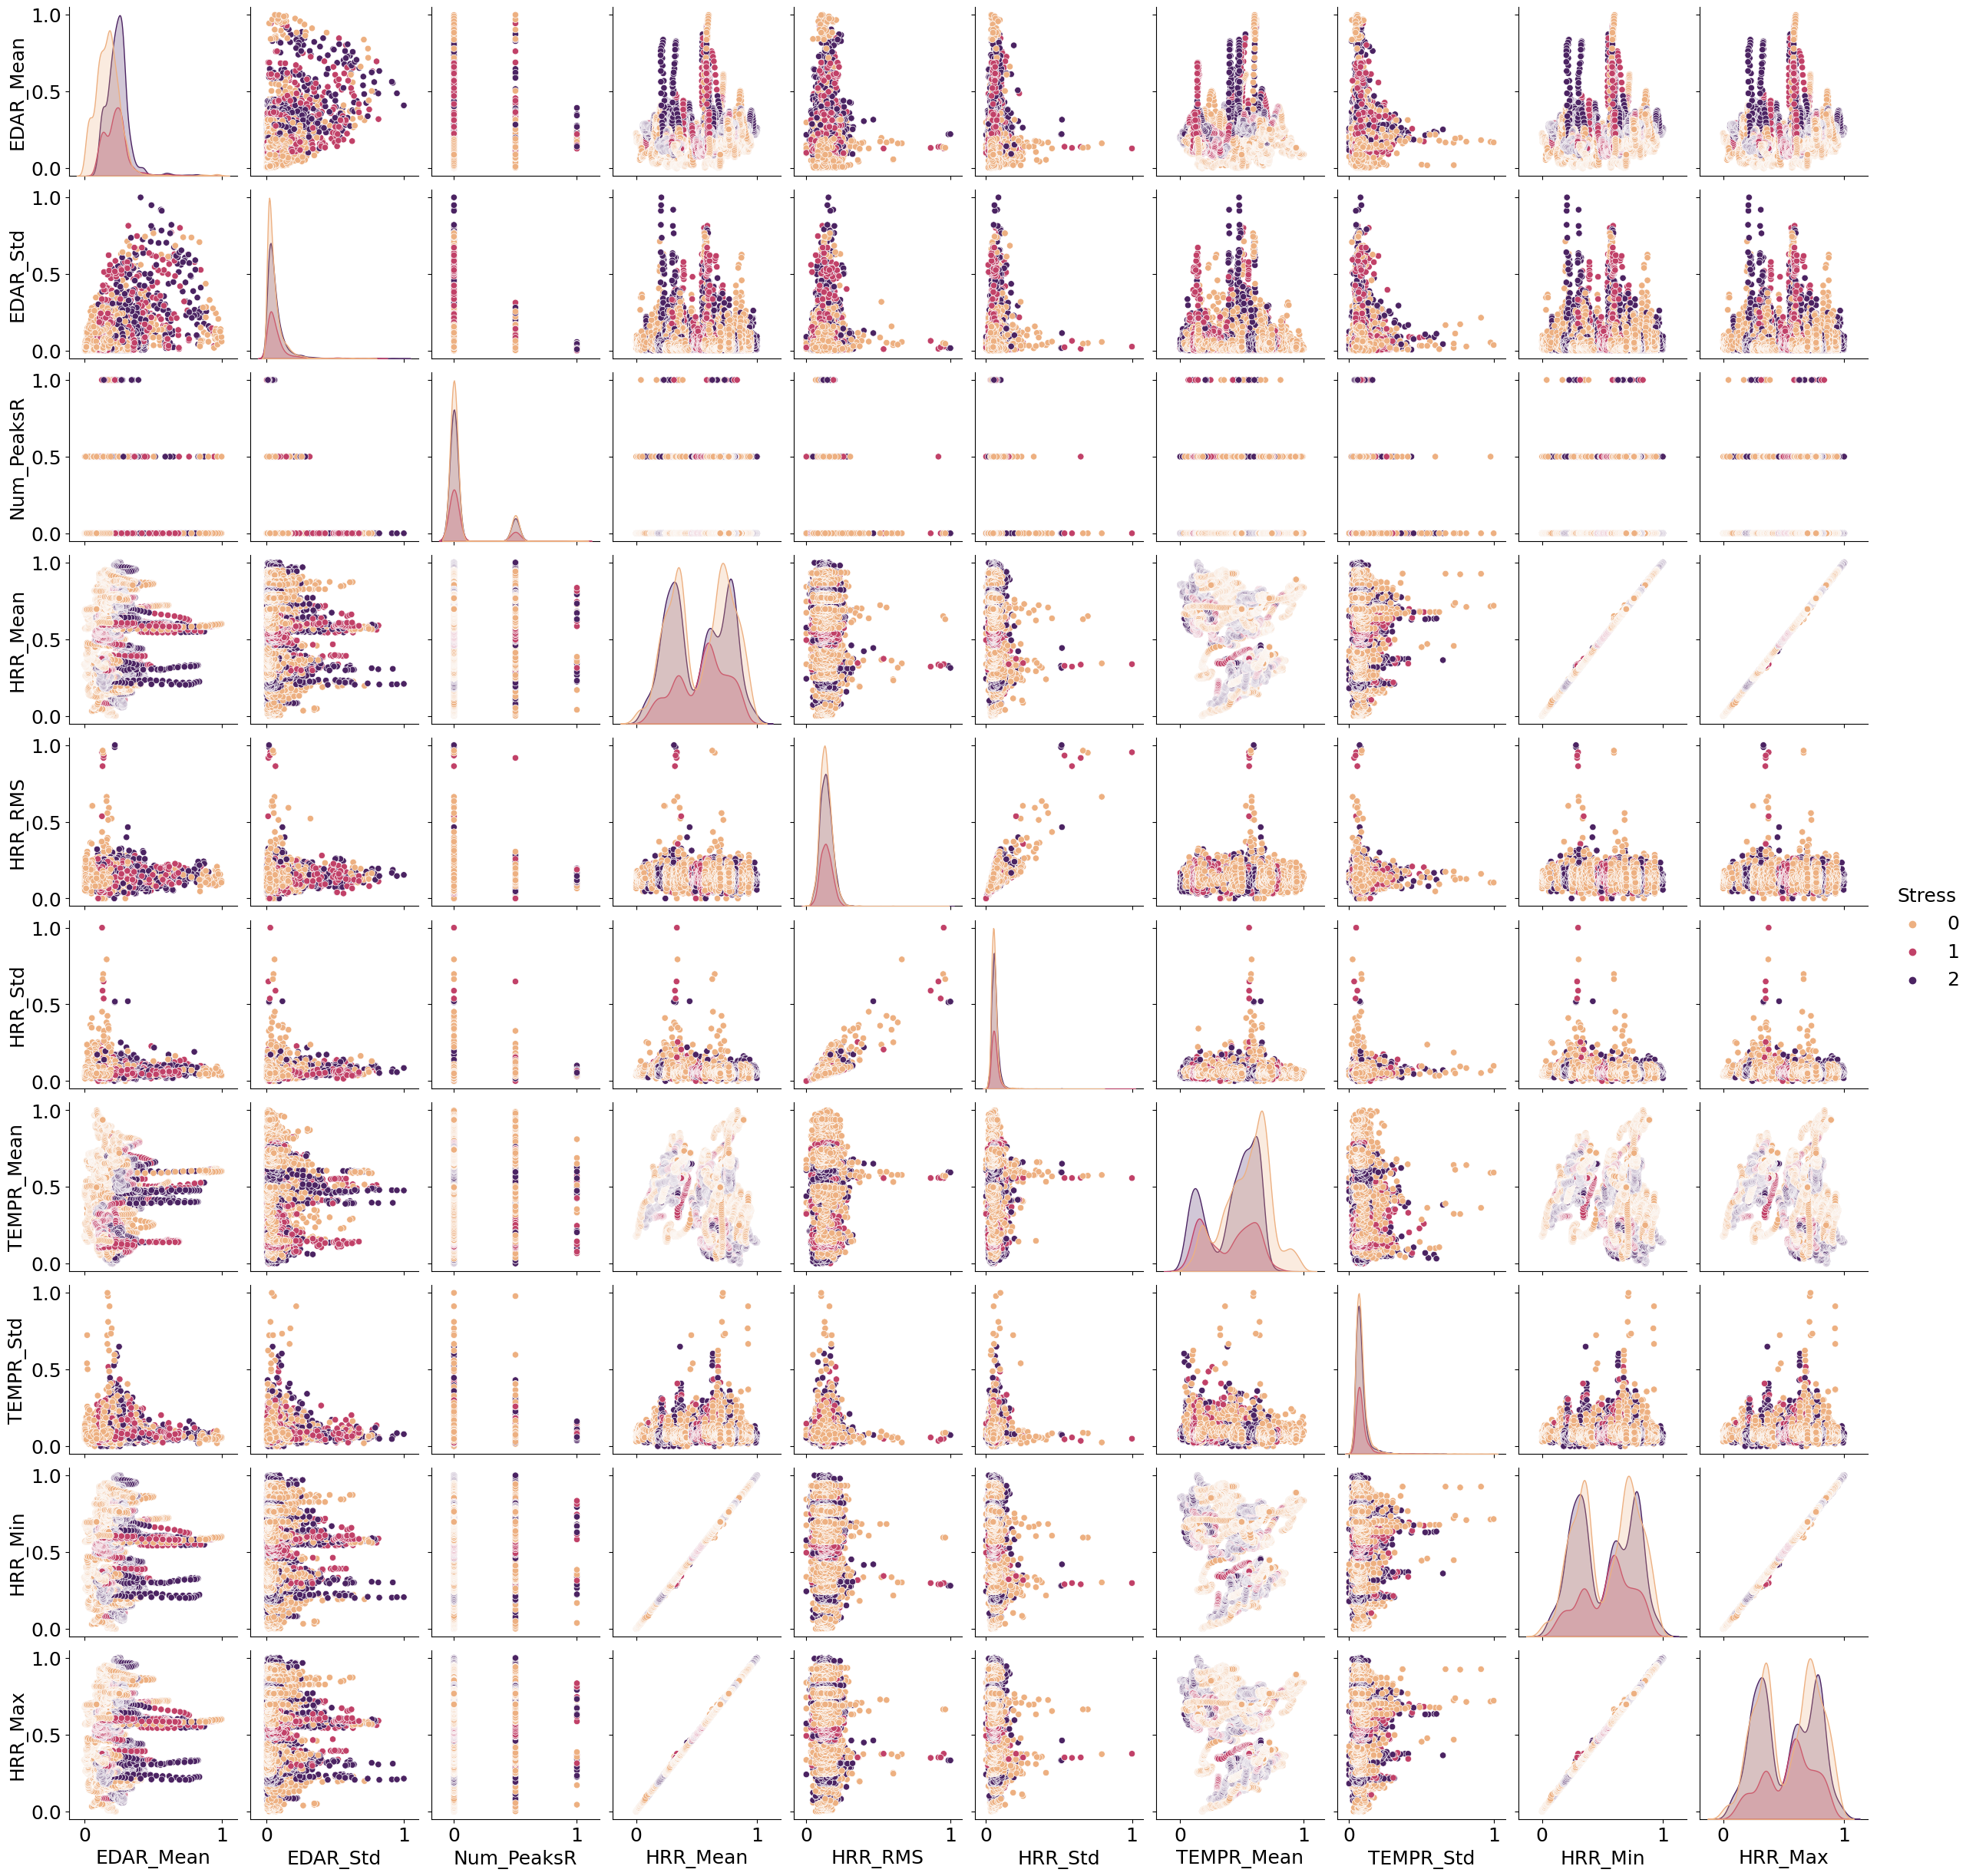

In [430]:
#Here is pairplot using Seaborn with specific  first few columns figure size 15x8, hue, and color palette 
plt.figure(figsize = (15,8))
sns.pairplot(df, hue=Yvar, palette=palette)  #Only taking columns for simplicity

### Specific two columns for pairplt 
 here are the specific columns i have selected for pairplt for understanding my consarnt.


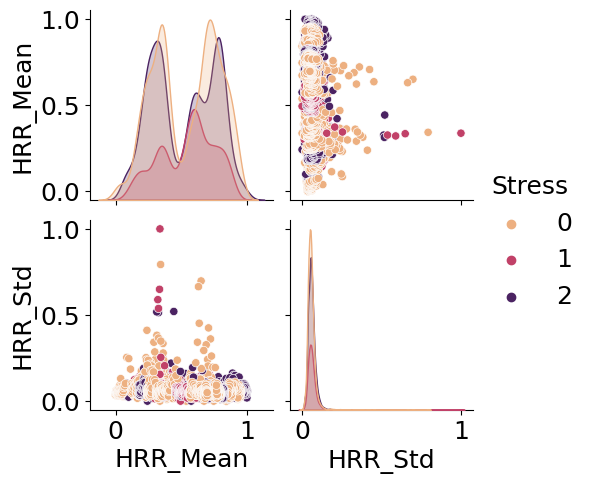

In [431]:
# here are the specific columns
selected_columns = ['HRR_Mean', 'HRR_Std','Stress']
# This is a DataFrame with only the selected columns
df_selected = df[selected_columns]
# Here is a pairplot using Seaborn with the selected columns
sns.pairplot(df_selected, hue=Yvar, palette=palette)
plt.show()

### Checking for Outliers:

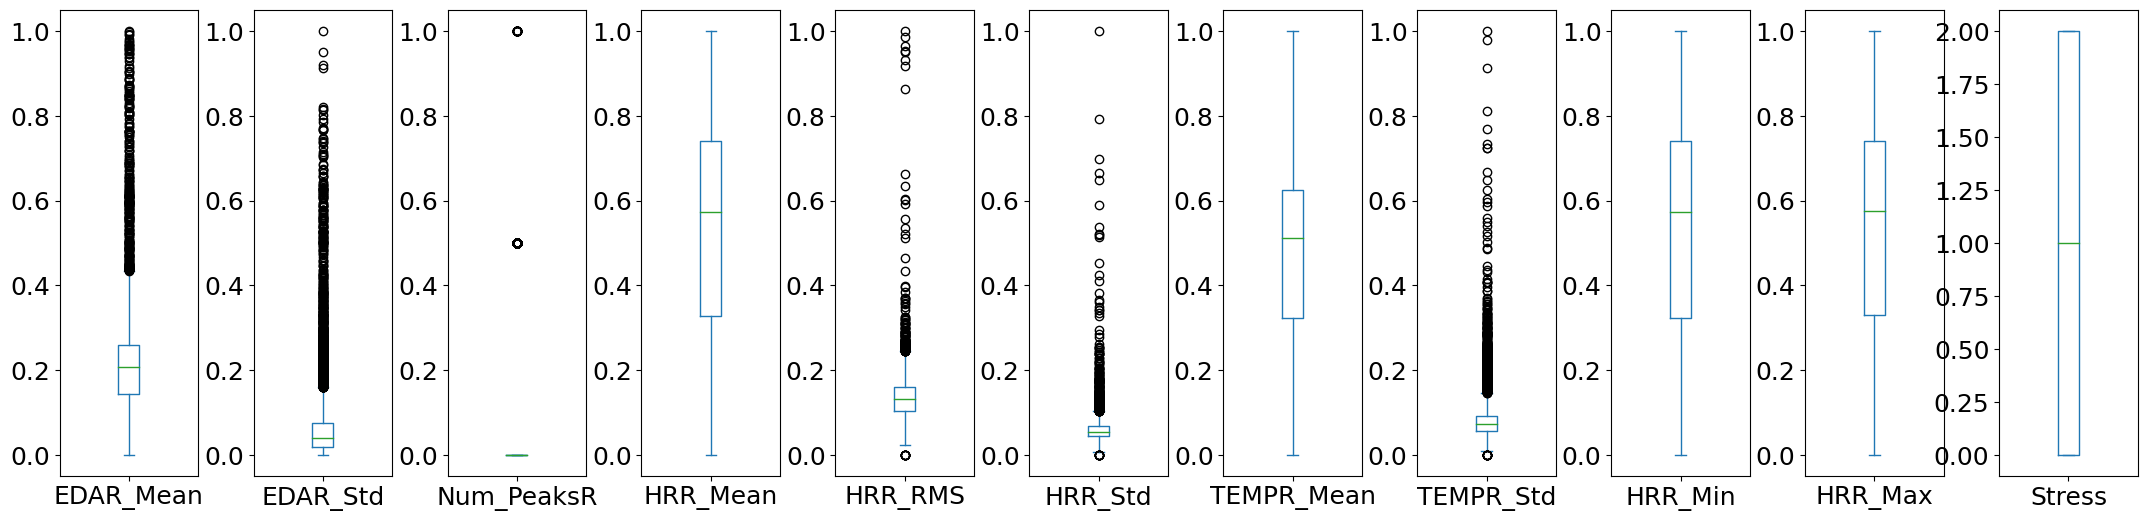

In [432]:
#Now I am doing  assuming 'data' in this DataFrame figure size 14x14 
df.plot(kind='box', subplots=True, layout=(2, 14), figsize=(14, 14), sharex=False, sharey=False)

# Adjust subplot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# Show the plot
plt.show()

### visualize the correlations between variables
Checking for Correlations: This is heatmap of the correlation matrix for the DataFrame df


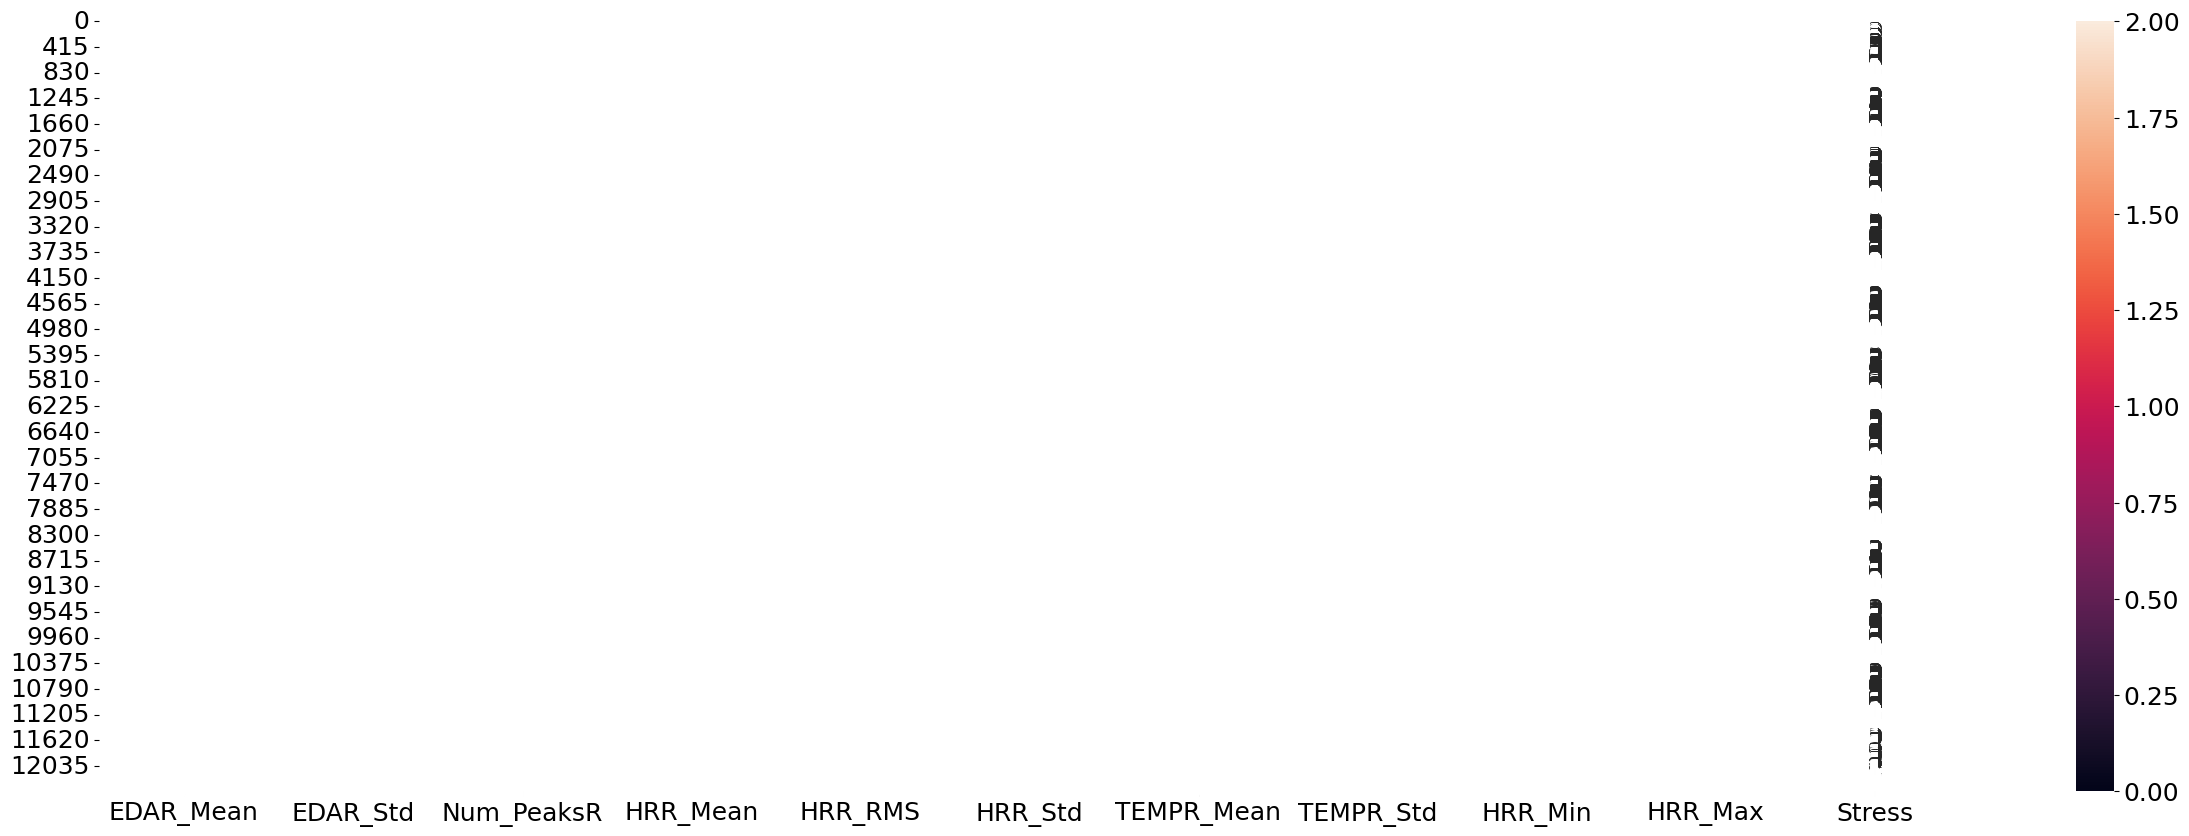

In [433]:
plt.figure(figsize=(30, 10))
matrix = np.triu(df)
sns.heatmap(df, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

## Correlation Matrix

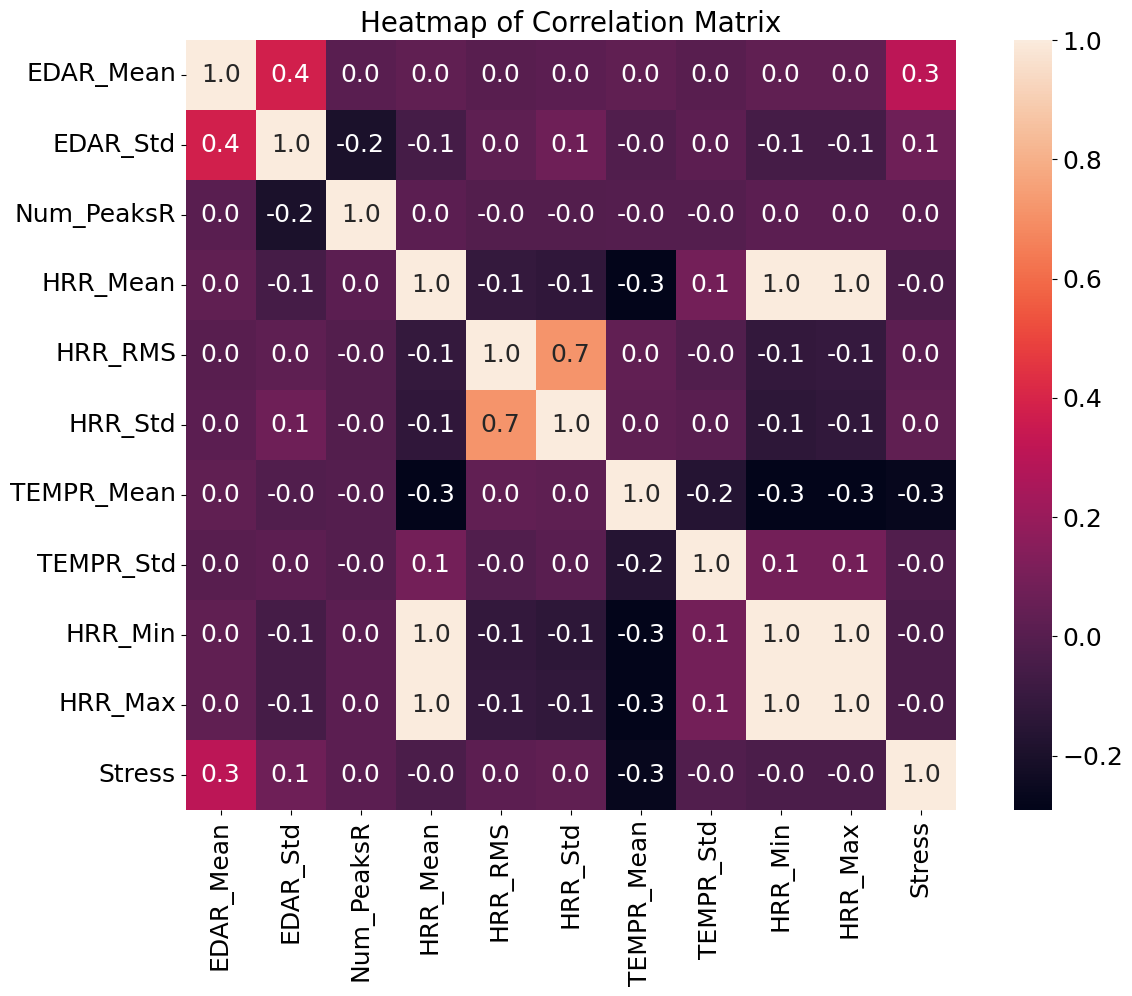

In [434]:
# This is custom figure size of 15x8 inches code
plt.figure(figsize=(15, 10))

# Display the correlation values inside each square cell, rounded to one decimal place
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns, annot=True, square=True, fmt='.1f')

# title 'Correlation' to the plot with a font size of 20
plt.title('Heatmap of Correlation Matrix', fontsize=20)

# Display the plot
plt.show()

### Specific two columns for correlation 
 here are the specific columns i have selected for correlation for understanding my consarnt.

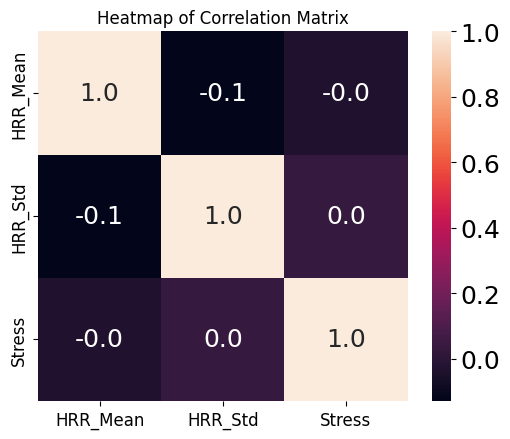

In [435]:
selected_columns = ['HRR_Mean', 'HRR_Std', 'Stress']
selected_data = df[selected_columns]

# Display the correlation values inside each square cell, rounded to one decimal place
heatmap = sns.heatmap(selected_data.corr(), xticklabels=selected_columns, yticklabels=selected_columns, annot=True, square=True, fmt='.1f')

# Adjust the font size of the tick labels on the x-axis and y-axis
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

# Set the title of the plot with a font size of 12
plt.title('Heatmap of Correlation Matrix', fontsize=12)

# Display the plot
plt.show()


## Count of Stress analysis and visualization

I have used countplot is a specific type of bar plot that displays the count or frequency of observations of 'Stress' variable for data analysis and visualization of this project.

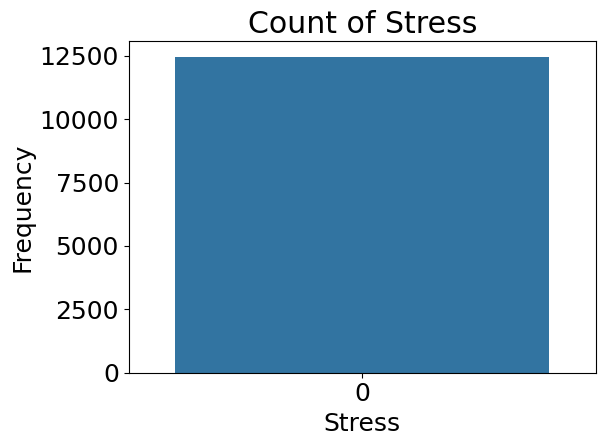

In [436]:
#lets check count of Stress
sns.countplot(df["Stress"])
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Count of Stress')
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

## Pearson vs Spearman Correlation with Stress

This function can be understood that is the difference between the two columns. 

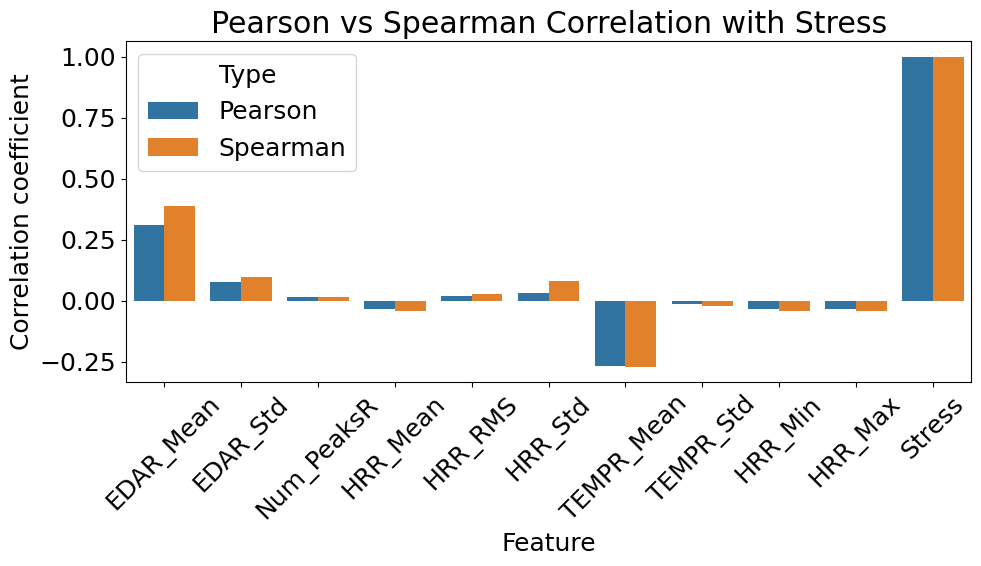

Feature with maximum difference: EDAR_Mean
Feature with minimum difference: Stress
            Pearson Correlation  Spearman Correlation  Difference
EDAR_Mean              0.308340              0.387291    0.078951
EDAR_Std               0.075108              0.097487    0.022379
Num_PeaksR             0.013914              0.012805    0.001109
HRR_Mean              -0.034776             -0.041178    0.006402
HRR_RMS                0.018029              0.028515    0.010486
HRR_Std                0.031129              0.079025    0.047896
TEMPR_Mean            -0.269011             -0.271901    0.002890
TEMPR_Std             -0.014696             -0.021621    0.006924
HRR_Min               -0.035004             -0.041393    0.006389
HRR_Max               -0.034568             -0.040887    0.006320
Stress                 1.000000              1.000000    0.000000
Selected features based on Pearson correlation:  ['EDAR_Mean', 'TEMPR_Mean', 'Stress']
Selected features based on Spearman co

In [437]:
# Compute Pearson and Spearman correlations
pearson_corr = df.corr(method='pearson')['Stress']
spearman_corr = df.corr(method='spearman')['Stress']

# Convert Series to DataFrame for Seaborn and concatenating them
total_df = pd.concat([
    pd.DataFrame({'Feature': pearson_corr.index, 'Correlation coefficient': pearson_corr.values, 'Type': 'Pearson'}),
    pd.DataFrame({'Feature': spearman_corr.index, 'Correlation coefficient': spearman_corr.values, 'Type': 'Spearman'})
])

# Seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Correlation coefficient', hue='Type', data=total_df)
plt.title('Pearson vs Spearman Correlation with Stress')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DataFrame for Pearson and Spearman correlations
corr_df = pd.DataFrame({
    'Pearson Correlation': pearson_corr,
    'Spearman Correlation': spearman_corr,
    'Difference': abs(pearson_corr - spearman_corr)  # Difference calculation
})

# Print the feature with maximum and minimum difference
print("Feature with maximum difference:", corr_df['Difference'].idxmax())
print("Feature with minimum difference:", corr_df['Difference'].idxmin())

# Display the correlations in tabular format
print(corr_df)

# Set correlation coefficient threshold
corr_threshold = 0.1

# Select features based on Pearson correlation
selected_features_pearson = [k for k, v in pearson_corr.items() if abs(v) >= corr_threshold]
print("Selected features based on Pearson correlation: ", selected_features_pearson)

# Select features based on Spearman correlation
selected_features_spearman = [k for k, v in spearman_corr.items() if abs(v) >= corr_threshold]
print("Selected features based on Spearman correlation: ", selected_features_spearman)


## Part 3: Model Evaluation and Summary

## 3. Feature Engineering:

### Feature Creation:


In [438]:

# For numerical columns, to fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df['Stress'] = imputer.fit_transform(df[['Stress']])

### Feature Transformation:


In [439]:
# Check for missing values in each column
print(df.isna().sum())

EDAR_Mean     0
EDAR_Std      0
Num_PeaksR    0
HRR_Mean      0
HRR_RMS       0
HRR_Std       0
TEMPR_Mean    0
TEMPR_Std     0
HRR_Min       0
HRR_Max       0
Stress        0
dtype: int64


In [440]:
# Drop the rows where 'Stress' is missing
df.dropna(subset=['Stress'], inplace=True)

In [441]:
# Encode 'Stress' using LabelEncoder
label_encoder = LabelEncoder()
df['Stress'] = label_encoder.fit_transform(df['Stress'])

### Feature Selection:


In [442]:
# Use a SimpleImputer to fill missing values with the mean value of each feature
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [443]:
# Convert the continuous target variable to binary classes based on a defined threshold
threshold = 0.5  
y_binary = np.where(y > threshold, 1, 0)

In [444]:
# Perform label encoding on y_binary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_binary)

# Print unique values in y_encoded to ensure encoding was successful
print(f"Unique values in y_encoded after encoding: {np.unique(y_encoded)}")

# Apply SMOTE oversampling to deal with class imbalance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y_encoded)

# Print counts of each class in y_resampled to ensure oversampling was successful
print(f"Counts of each class in y_resampled after oversampling: {np.bincount(y_resampled)}")

# Initialize the logistic regression model
model = LogisticRegression()

# Use Recursive Feature Elimination (RFE) to select the top 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X_resampled, y_resampled)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Unique values in y_encoded after encoding: [0 1]
Counts of each class in y_resampled after oversampling: [7035 7035]


Num Features: 5
Selected Features: [ True False False False False  True  True  True  True False]
Feature Ranking: [1 2 6 3 5 1 1 1 1 4]


In [445]:
y_resampled = [7035, 7035]
class_counts = Counter(y_resampled)
print(f"Counts of each class: {class_counts}")

Counts of each class: Counter({7035: 2})


### Dimensionality Reduction:


In [446]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Principal Component Analysis (PCA)

In [447]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained variance ratio: ", pca.explained_variance_ratio_)

Explained variance ratio:  [0.32019141 0.16693586]


In [448]:
explained_variance_ratio = [0.32019141, 0.16693586]
total_variance_explained = sum(explained_variance_ratio)
print(f"Total variance explained by the two components: {total_variance_explained:.2%}")

Total variance explained by the two components: 48.71%


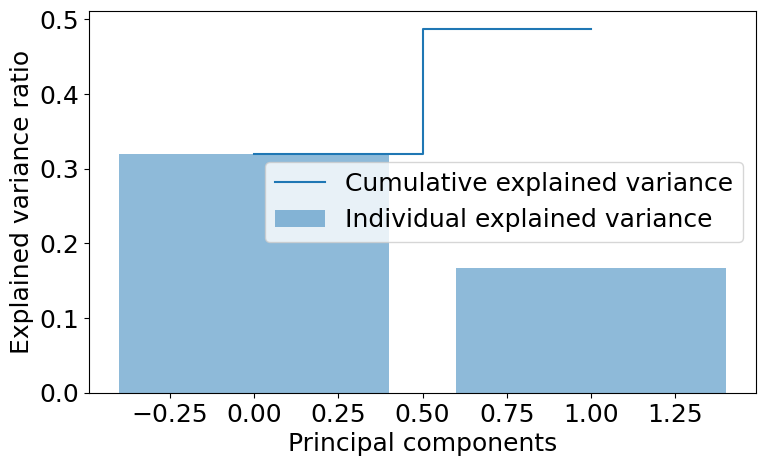

In [449]:

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.bar(range(len(cumulative_variance)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [450]:
# If i want to retain 95% variance, i can do PCA like this:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# Print the number of components chosen
print("Number of components chosen to retain 95% variance: ", pca_95.n_components_)

Number of components chosen to retain 95% variance:  7


### Handling Imbalanced Data:


In [451]:
# Convert the target variable to int type
y = y.astype(int)

# Apply SMOTE oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Display the new class distribution
print("After resampling with SMOTE, counts of label '1': {}".format(sum(y_res==1)))
print("After resampling with SMOTE, counts of label '0': {}".format(sum(y_res==0)))


After resampling with SMOTE, counts of label '1': 5410
After resampling with SMOTE, counts of label '0': 5410


## 4. Model Building and Training:



## The Classification

### Exploration of this model 

Simply attempting to implement an ML algorithm (without optimization or an ideal selection)

#### K-NN Model for the project
- **Keyword** : straightforward, comprehensible, flexible, ML
- **utilization** : detecting handwriting, recognizing images, identifying video content
- **Strengths**: valuable when labeled data is costly or unattainable, provides high accuracy
- **Weaknesses**: struggles with a large number of features (requires more data, leading to a risk of overfitting)

In this case, it's suitable since we don't have an excessive number of features.

### Split the data into training and testing sets X and Y

In [452]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [453]:
# Training a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### GridSearchCV  Model

In [454]:
# Define my model
model = SVC()

# Define my parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
} 

# To GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to this training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the model with the best parameters on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test score: {test_score}")

Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Test score: 0.7087183607874649


In [455]:
# Initialize a K-Nearest Neighbors (KNN) classifier with 3 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [456]:
# Fit the KNN model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [457]:
# Calculate and print the accuracy score of the KNN model on the test data
accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
print("Accuracy (KNN):", accuracy_knn)

Accuracy (KNN): 0.8477300120530333


## To Model Improving

### Hyperparameters for a machine learning model

In [458]:
# Use the KNN model to predict on the testing data
y_pred = knn.predict(X_test)

Confusion Matrix: Hyperparameters for a machine learning model 
[[998  37  47]
 [ 48 312  90]
 [ 90  67 800]]


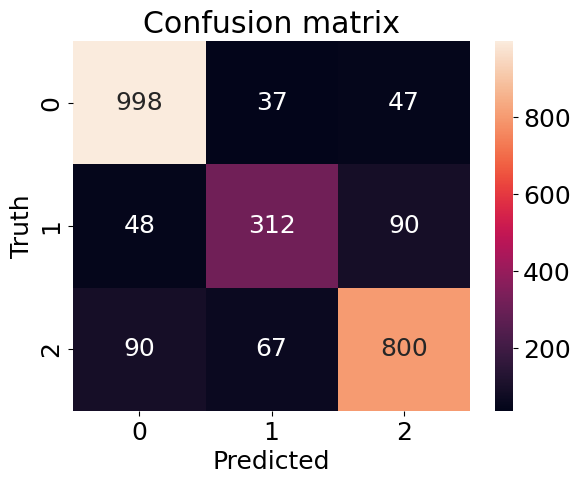

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1082
           1       0.90      0.77      0.83       450
           2       0.90      0.94      0.92       957

    accuracy                           0.92      2489
   macro avg       0.91      0.89      0.90      2489
weighted avg       0.92      0.92      0.92      2489



In [459]:
# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: Hyperparameters for a machine learning model ")
print(cm)


# Plot the confusion matrix
# plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

### classification report with K-NN

In [460]:
# Calculate and print the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report: ")
print(cr)


# Define the hyperparameters and the values to test
param_grid = {'n_neighbors': np.arange(1, 50), 'weights': ['uniform', 'distance']}

# Initialize a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()

# Initialize the Grid Search CV
gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit the GSCV on the training data
gscv.fit(X_train, y_train)

# Print the best parameters found by GSCV
print(gscv.best_params_)

# Initialize a K-Nearest Neighbors (KNN) classifier with the best parameters found by GSCV
knn = KNeighborsClassifier(n_neighbors=gscv.best_params_['n_neighbors'], weights=gscv.best_params_['weights'])

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Use the KNN model to predict on the testing data
y_pred = knn.predict(X_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate and print the classification report
cr = classification_report(y_test, y_pred)
print(cr)


Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1082
           1       0.90      0.77      0.83       450
           2       0.90      0.94      0.92       957

    accuracy                           0.92      2489
   macro avg       0.91      0.89      0.90      2489
weighted avg       0.92      0.92      0.92      2489

{'n_neighbors': 1, 'weights': 'uniform'}
[[973  59  50]
 [ 34 339  77]
 [ 52  71 834]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1082
           1       0.72      0.75      0.74       450
           2       0.87      0.87      0.87       957

    accuracy                           0.86      2489
   macro avg       0.84      0.84      0.84      2489
weighted avg       0.86      0.86      0.86      2489



###  Compare the both models KNN and GridSearchCV for Hyperparameters. 

In [461]:
# X = df[['EDAR_Mean', 'TEMPR_Mean']] 
# y = df['Stress'] 

# Splitting the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Dictionary to store best parameters
best_params = {}

# Define this model and parameter grid
models = {
    'SVC': {
        'model': SVC(),
        'params' : {
            'C': [0.1, 1, 10, 100], 
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    },
    
    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': np.arange(1, 50),
            'weights': ['uniform', 'distance']
        }
    }
}

# Grid search for hyperparameter tuning
for model_name, mp in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

# Print best parameters and score
for model_name, bp in best_params.items():
    print(f"Model: {model_name}")
    print(f"Best parameters: {bp['best_params']}")
    print(f"Best score: {bp['best_score']:.5f}")
    print("\n")


Running GridSearchCV for SVC...
Running GridSearchCV for KNN...
Model: SVC
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.70068


Model: KNN
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best score: 0.84602




#### KNN with Feature Selection
KNN performs better with fewer features, especially since the features in this dataset appear to be correlated. To reduce the dimensionality, we will use Recursive Feature Selection (RFS) to decrease the number of features to 2.

In [462]:

# Perform Recursive Feature Elimination (RFE) to select the top 2 features
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)

knn_rfe = KNeighborsClassifier(n_neighbors=3)
pipeline = Pipeline(steps=[('RFE', rfe), ('KNN', knn_rfe)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('RFE',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=2)),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [463]:
# Calculate and print the accuracy score of the KNN model with feature selection on the test data
accuracy_rfe = accuracy_score(y_test, pipeline.predict(X_test))
print("Accuracy (KNN with feature selection):", accuracy_rfe)

Accuracy (KNN with feature selection): 0.840498192044998


## A bit better KNN model Cross Validation & Stratified K-Fold 

In [464]:
# Initialize parameters for KNeighborsClassifier and DecisionTreeClassifier
k_values = [5, 10, 15]
max_depth_values = [20, 40, 60]

# Iterate over the parameter combinations
for i in range(len(k_values)):
    models = [
        ('K-NN', KNeighborsClassifier(n_neighbors=k_values[i])),
        ('NB', GaussianNB()),
        ('DT', DecisionTreeClassifier(max_depth=max_depth_values[i], random_state=101))
    ]

    print("K:", k_values[i], "and max_depth:", max_depth_values[i])
    
    # Stratified K-Fold 
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("")

K: 5 and max_depth: 20


K-NN: 0.816695 (0.010494)
NB: 0.563782 (0.009386)
DT: 0.859783 (0.008019)

K: 10 and max_depth: 40
K-NN: 0.803436 (0.007338)
NB: 0.563782 (0.009386)
DT: 0.860988 (0.007755)

K: 15 and max_depth: 60
K-NN: 0.791685 (0.007629)
NB: 0.563782 (0.009386)
DT: 0.860988 (0.007755)



### K-Neighbors Classifier

In [465]:
# Here is my KNeighborsClassifier model with n_neighbors set to 5
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
predict_knn = model_knn.predict(X_test)

#### KNN model predictions

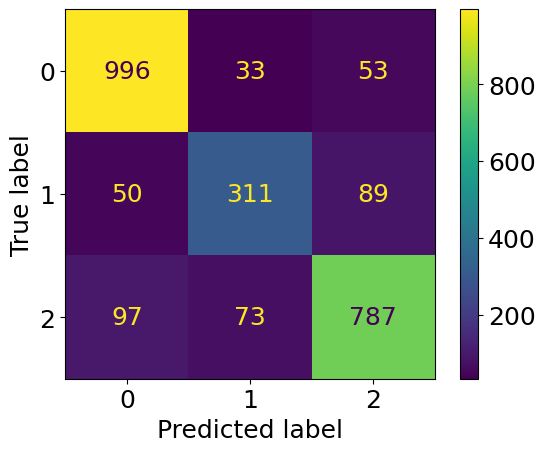

Confusion Matrix of the KNN model predictions
[[996  33  53]
 [ 50 311  89]
 [ 97  73 787]]
Classification report of the KNN model predictions:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1082
           1       0.75      0.69      0.72       450
           2       0.85      0.82      0.83       957

    accuracy                           0.84      2489
   macro avg       0.82      0.81      0.82      2489
weighted avg       0.84      0.84      0.84      2489



In [466]:
from sklearn import metrics

# Assuming predict_knn are the predictions from my KNN model
# Calculate the confusion matrix using the true labels (y_test) and the predicted labels (predict_knn)
confusion_matrix_knn = metrics.confusion_matrix(y_test, predict_knn)

# confusion matrix display and plot it
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()

print("Confusion Matrix of the KNN model predictions")
print(confusion_matrix_knn)

print("Classification report of the KNN model predictions:")

# Print the classification report of the KNN model predictions
print(metrics.classification_report(y_test, predict_knn))


### GaussianNB model

In [467]:
# This is my GaussianNB model fot the confioition matrix 
model_nb = GaussianNB()

# Fit the model on the training data
model_nb.fit(X_train, y_train)

# Make predictions using the trained model on the test data
predict_nb = model_nb.predict(X_test)


#### Naive Bayes model predictions

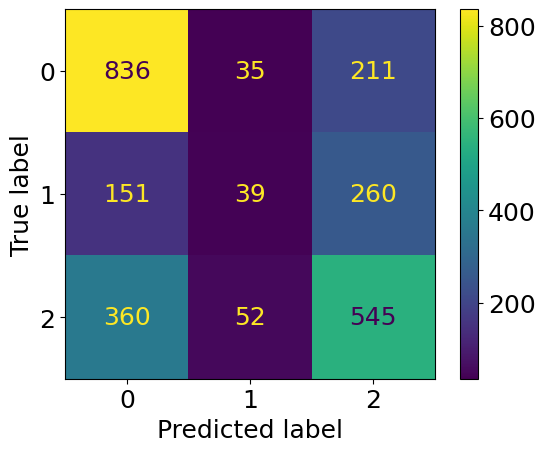

Confusion Matrix of the Naive Bayes model predictions
[[836  35 211]
 [151  39 260]
 [360  52 545]]
Naive Bayes model predictions: 
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1082
           1       0.31      0.09      0.14       450
           2       0.54      0.57      0.55       957

    accuracy                           0.57      2489
   macro avg       0.49      0.48      0.46      2489
weighted avg       0.53      0.57      0.54      2489



In [468]:
# Plot the confusion matrix for the Naive Bayes model predictions
confusion_matrix_nb = metrics.confusion_matrix(y_test, predict_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_nb, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()


print("Confusion Matrix of the Naive Bayes model predictions")
print(confusion_matrix_nb)


print("Naive Bayes model predictions: ")
# Here is our printed classification report of the Naive Bayes model predictions
print(classification_report(y_test, predict_nb))

### DecisionTreeClassifier model

In [469]:
# DecisionTreeClassifier model with max_depth=40 and random_state=101
model_dt = DecisionTreeClassifier(max_depth=40, random_state=101)

# Fit the model on the training data
model_dt.fit(X_train, y_train)

# Make predictions using the trained model on the test data
predict_dt = model_dt.predict(X_test)

#### Decision Tree Classifier model predictions

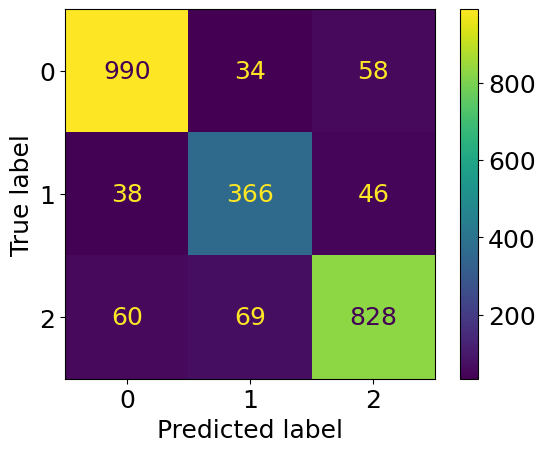

Confusion Matrix of the Decision Tree Classifier model predictions
[[990  34  58]
 [ 38 366  46]
 [ 60  69 828]]
Decision Tree Classifier model predictions 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1082
           1       0.78      0.81      0.80       450
           2       0.89      0.87      0.88       957

    accuracy                           0.88      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.88      0.88      0.88      2489



In [470]:
# Plot the confusion matrix for the Decision Tree Classifier model predictions 
confusion_matrix_dt = metrics.confusion_matrix(y_test, predict_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels = [0,1,2])
cm_display.plot()
plt.show()

print("Confusion Matrix of the Decision Tree Classifier model predictions")
print(confusion_matrix_dt)

print("Decision Tree Classifier model predictions ")
# Here is our printed classification report of the Decision Tree Classifier model predictions 
print(classification_report(y_test, predict_dt))

# Thank you 